In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [18]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [19]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,CH = CH)
print(len(train_loader), len(val_loader), len(test_loader))
## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

161 23 52


In [20]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 5])
torch.Size([256, 1])
256
256
256


date:180322, rec:007, time:3486.0


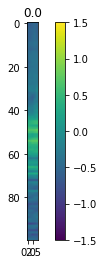

date:180324, rec:003, time:2969.0


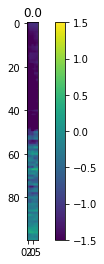

date:180325, rec:005, time:1251.0


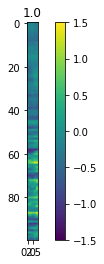

date:180325, rec:007, time:5105.0


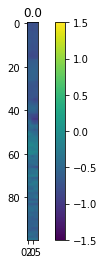

date:180401, rec:001, time:882.0


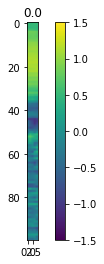

date:180325, rec:007, time:5115.0


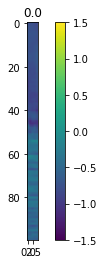

date:180325, rec:001, time:1237.0


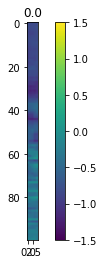

date:180325, rec:009, time:4951.0


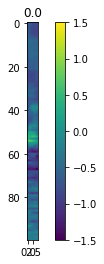

date:180324, rec:008, time:3605.0


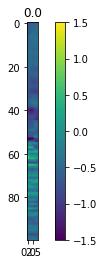

date:180401, rec:003, time:601.0


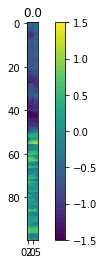

date:180401, rec:001, time:1817.0


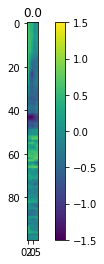

date:180323, rec:001, time:6585.0


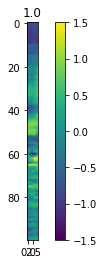

date:180325, rec:009, time:4886.0


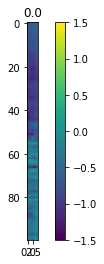

date:180401, rec:001, time:1712.0


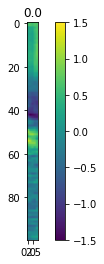

date:180323, rec:007, time:5453.0


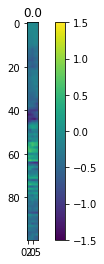

date:180323, rec:002, time:4166.0


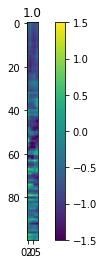

date:180323, rec:007, time:6123.0


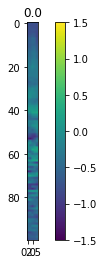

date:180325, rec:004, time:4137.0


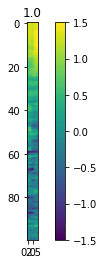

date:180324, rec:008, time:1923.0


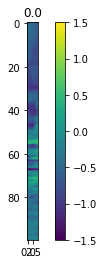

date:180325, rec:009, time:197.0


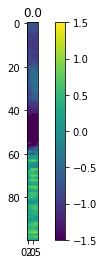

date:180325, rec:001, time:3043.0


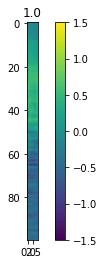

date:180322, rec:001, time:102.0


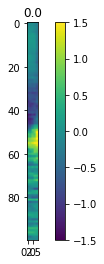

date:180324, rec:004, time:4341.0


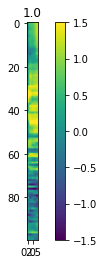

date:180325, rec:005, time:4228.0


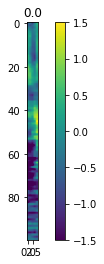

date:180322, rec:007, time:4487.0


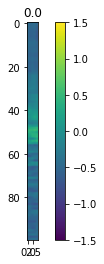

date:180325, rec:006, time:1181.0


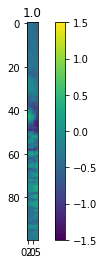

date:180322, rec:003, time:4546.0


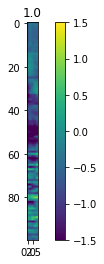

date:180325, rec:006, time:4467.0


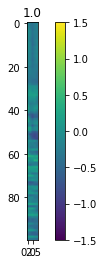

date:180323, rec:006, time:4426.0


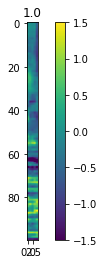

date:180323, rec:003, time:5523.0


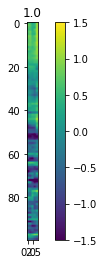

date:180324, rec:003, time:2001.0


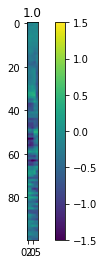

date:180325, rec:007, time:4670.0


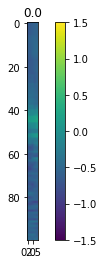

date:180323, rec:002, time:5082.0


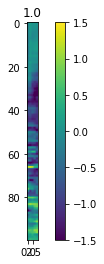

date:180401, rec:001, time:3958.0


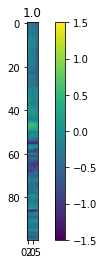

date:180325, rec:004, time:5589.0


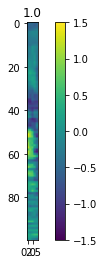

date:180323, rec:007, time:6568.0


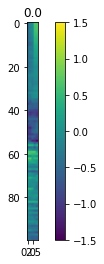

date:180325, rec:007, time:2608.0


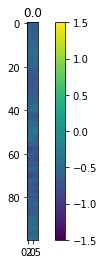

date:180325, rec:007, time:4070.0


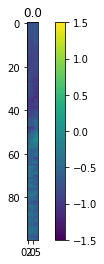

date:180324, rec:003, time:392.0


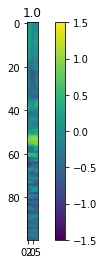

date:180325, rec:003, time:2442.0


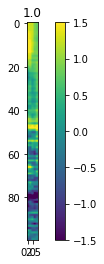

date:180322, rec:007, time:3947.0


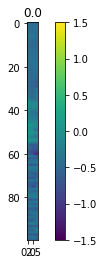

date:180324, rec:009, time:177.0


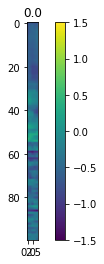

date:180324, rec:008, time:4386.0


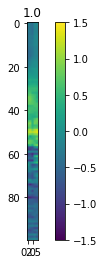

date:180325, rec:005, time:1621.0


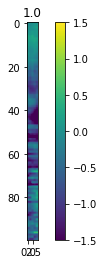

date:180322, rec:003, time:4576.0


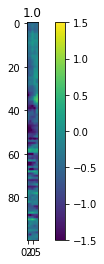

date:180325, rec:007, time:4805.0


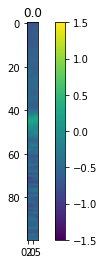

date:180325, rec:003, time:4500.0


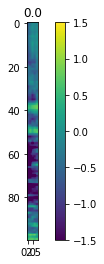

date:180324, rec:004, time:5341.0


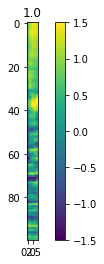

date:180322, rec:007, time:3897.0


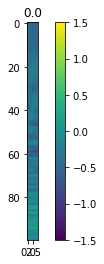

date:180322, rec:002, time:4891.0


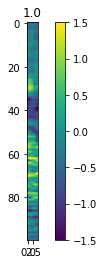

date:180324, rec:009, time:1004.0


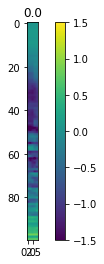

date:180323, rec:007, time:2917.0


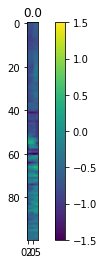

date:180325, rec:005, time:2568.0


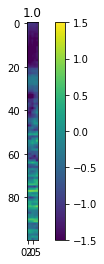

date:180322, rec:003, time:5968.0


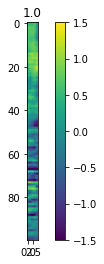

date:180325, rec:007, time:3183.0


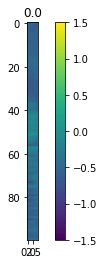

date:180324, rec:001, time:757.0


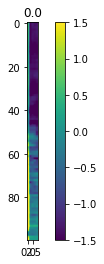

date:180325, rec:001, time:627.0


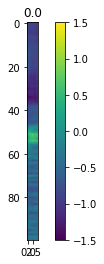

date:180323, rec:004, time:6488.0


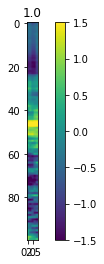

date:180325, rec:009, time:1457.0


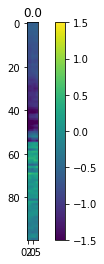

date:180322, rec:003, time:1080.0


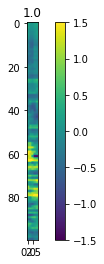

date:180324, rec:003, time:3664.0


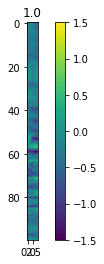

date:180325, rec:007, time:3198.0


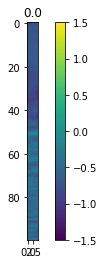

date:180323, rec:001, time:7070.0


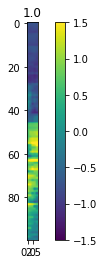

date:180401, rec:001, time:1062.0


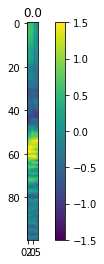

date:180322, rec:004, time:5091.0


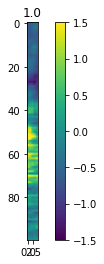

date:180323, rec:002, time:1359.0


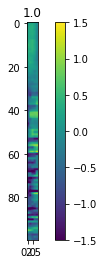

date:180322, rec:003, time:3255.0


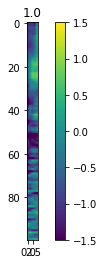

date:180324, rec:008, time:2855.0


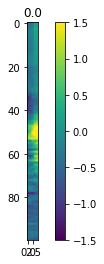

date:180325, rec:003, time:6659.0


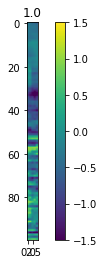

date:180322, rec:005, time:2718.0


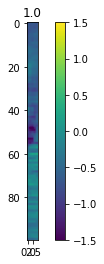

date:180323, rec:004, time:3765.0


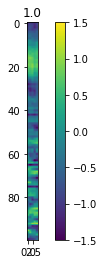

date:180401, rec:002, time:6436.0


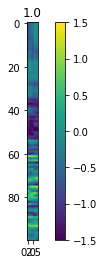

date:180323, rec:002, time:1779.0


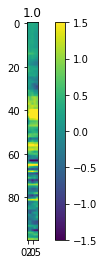

date:180324, rec:003, time:3234.0


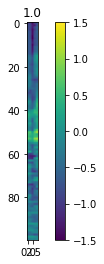

date:180325, rec:009, time:2342.0


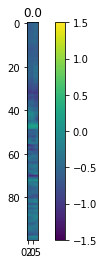

date:180325, rec:009, time:1332.0


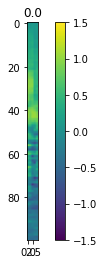

date:180325, rec:004, time:6787.0


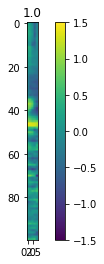

date:180323, rec:003, time:327.0


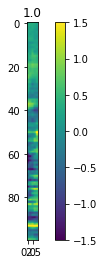

date:180323, rec:007, time:5488.0


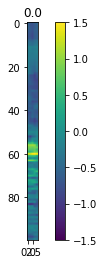

date:180324, rec:008, time:1673.0


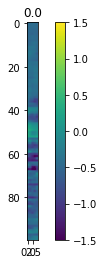

date:180401, rec:001, time:637.0


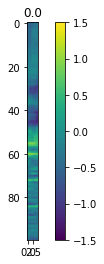

date:180325, rec:007, time:917.0


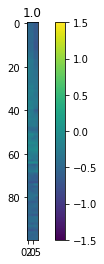

date:180325, rec:001, time:732.0


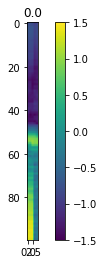

date:180325, rec:001, time:1882.0


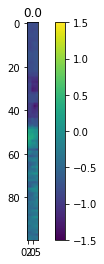

date:180322, rec:004, time:6818.0


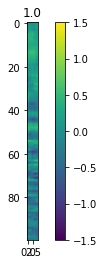

date:180323, rec:004, time:6133.0


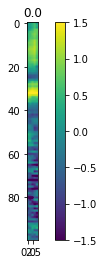

date:180325, rec:003, time:2212.0


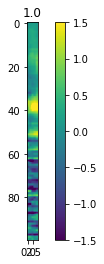

date:180323, rec:003, time:3173.0


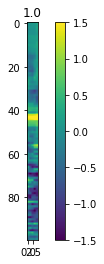

date:180323, rec:005, time:3593.0


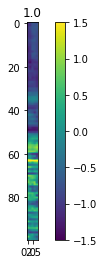

date:180325, rec:009, time:6492.0


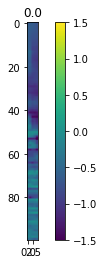

date:180401, rec:001, time:5474.0


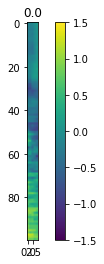

date:180324, rec:001, time:672.0


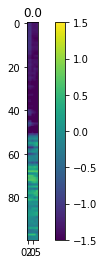

date:180325, rec:004, time:5584.0


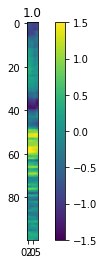

date:180322, rec:001, time:102.0


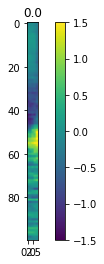

date:180323, rec:003, time:5763.0


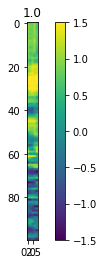

date:180324, rec:008, time:2745.0


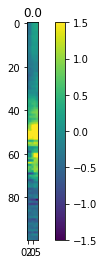

date:180325, rec:007, time:6685.0


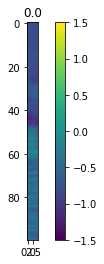

date:180325, rec:009, time:2472.0


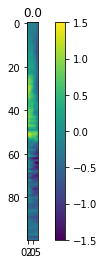

date:180325, rec:001, time:1897.0


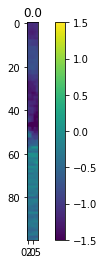

date:180324, rec:004, time:2006.0


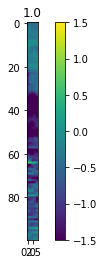

date:180325, rec:009, time:6086.0


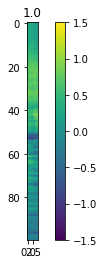

date:180325, rec:001, time:397.0


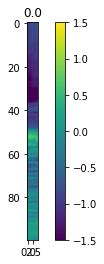

date:180401, rec:001, time:3400.0


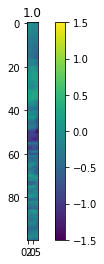

date:180325, rec:007, time:352.0


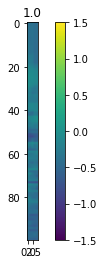

date:180325, rec:007, time:4620.0


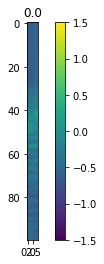

date:180325, rec:009, time:5101.0


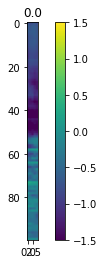

date:180401, rec:001, time:6455.0


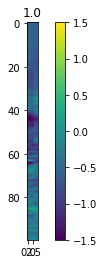

date:180324, rec:005, time:57.0


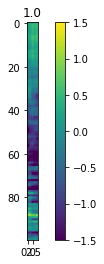

date:180401, rec:001, time:1527.0


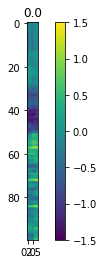

date:180323, rec:003, time:4863.0


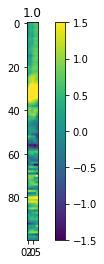

date:180325, rec:002, time:1027.0


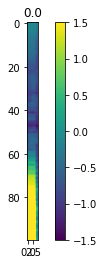

date:180322, rec:001, time:92.0


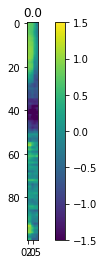

date:180322, rec:007, time:3286.0


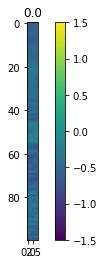

date:180322, rec:002, time:7067.0


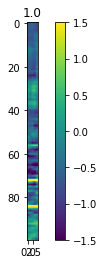

date:180323, rec:003, time:5298.0


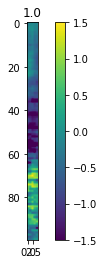

date:180325, rec:009, time:4561.0


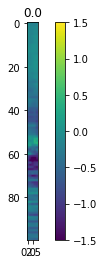

date:180324, rec:008, time:3790.0


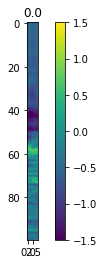

date:180324, rec:006, time:459.0


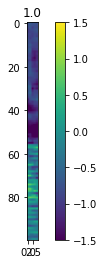

date:180325, rec:007, time:4700.0


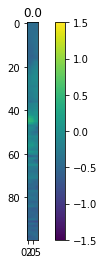

date:180324, rec:008, time:1128.0


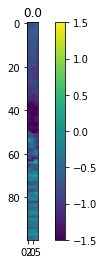

date:180325, rec:007, time:6780.0


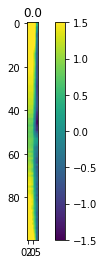

date:180324, rec:008, time:3750.0


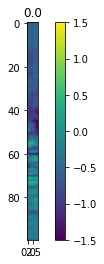

date:180324, rec:009, time:1154.0


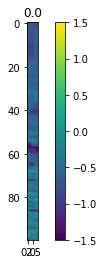

date:180325, rec:002, time:717.0


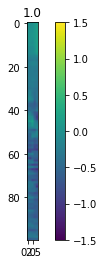

date:180323, rec:002, time:3956.0


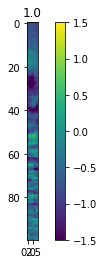

date:180322, rec:003, time:5647.0


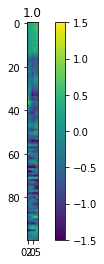

date:180325, rec:005, time:6640.0


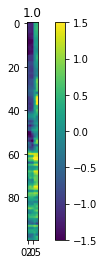

date:180401, rec:002, time:2288.0


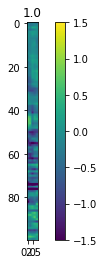

In [10]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [0]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 5



Train loss for epoch 0: 0.5451551079750061
Val loss for epoch 0: 0.5001120567321777
Train loss for epoch 1: 0.5185078382492065
Val loss for epoch 1: 0.49885037541389465
1
Train loss for epoch 2: 0.5102680325508118
Val loss for epoch 2: 0.49172350764274597
2
Train loss for epoch 3: 0.5054313540458679
Val loss for epoch 3: 0.49388831853866577
Train loss for epoch 4: 0.5021870136260986
Val loss for epoch 4: 0.49294421076774597
Train loss for epoch 5: 0.4997963011264801
Val loss for epoch 5: 0.4951026141643524
Train loss for epoch 6: 0.49764445424079895
Val loss for epoch 6: 0.49791043996810913
Train loss for epoch 7: 0.4964556097984314
Val loss for epoch 7: 0.490716814994812
7
Train loss for epoch 8: 0.49514397978782654
Val loss for epoch 8: 0.4894837439060211
8
Train loss for epoch 9: 0.49459341168403625
Val loss for epoch 9: 0.4913588762283325
Train loss for epoch 10: 0.4942891299724579
Val loss for epoch 10: 0.500741720199585
Train loss for epoch 11: 0.4939888119697571
Val loss for epo

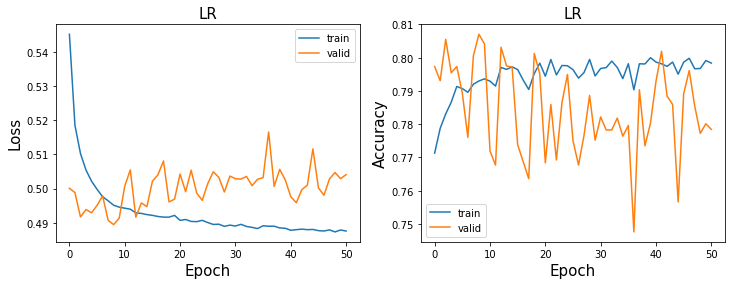

In [12]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0          8


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models/LR_CH23_LOSSbce_REGnone0_EPOCH8_valbalanced.pt


validation loss:0.4799049496650696 accuracy:0.8172683923705722
0.5
date:180329, rec:006, time:1801.0, label:1.0
Original data 62 CH


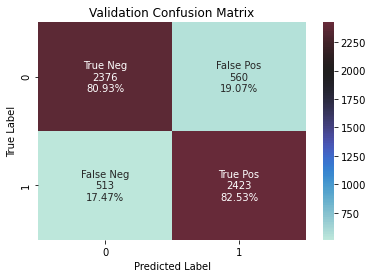

In [23]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic regression with L2 regularization

In [24]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
timewindow = 5



Train loss for epoch 0: 0.5482630133628845
Val loss for epoch 0: 0.5046695470809937
Train loss for epoch 1: 0.5206620693206787
Val loss for epoch 1: 0.5079846382141113
Train loss for epoch 2: 0.5134193897247314
Val loss for epoch 2: 0.4968194365501404
2
Train loss for epoch 3: 0.5092206597328186
Val loss for epoch 3: 0.49933892488479614
Train loss for epoch 4: 0.5049965381622314
Val loss for epoch 4: 0.49627193808555603
4
Train loss for epoch 5: 0.5029693245887756
Val loss for epoch 5: 0.49270591139793396
5
Train loss for epoch 6: 0.5022727251052856
Val loss for epoch 6: 0.49206236004829407
6
Train loss for epoch 7: 0.49975043535232544
Val loss for epoch 7: 0.5034801959991455
Train loss for epoch 8: 0.4992294907569885
Val loss for epoch 8: 0.4936177134513855
Train loss for epoch 9: 0.498761385679245
Val loss for epoch 9: 0.49693533778190613
Train loss for epoch 10: 0.49830275774002075
Val loss for epoch 10: 0.504486620426178
Train loss for epoch 11: 0.4988977313041687
Val loss for epoc

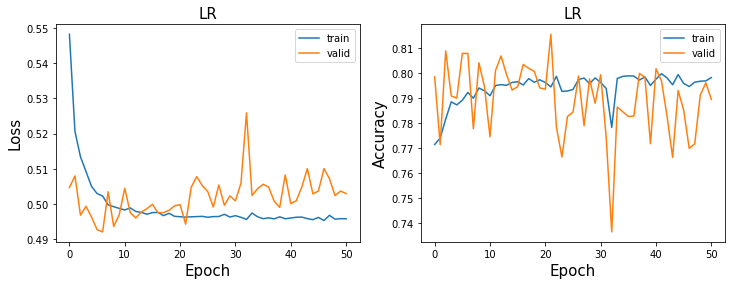

Train loss for epoch 0: 0.638318657875061
Val loss for epoch 0: 0.5557568669319153
Train loss for epoch 1: 0.5894773602485657
Val loss for epoch 1: 0.5538893342018127
1
Train loss for epoch 2: 0.5838760137557983
Val loss for epoch 2: 0.5586420297622681
Train loss for epoch 3: 0.5818976163864136
Val loss for epoch 3: 0.5489671230316162
3
Train loss for epoch 4: 0.5800139904022217
Val loss for epoch 4: 0.5508010983467102
Train loss for epoch 5: 0.5788484811782837
Val loss for epoch 5: 0.5505493879318237
Train loss for epoch 6: 0.5784657597541809
Val loss for epoch 6: 0.5580512881278992
Train loss for epoch 7: 0.5786890983581543
Val loss for epoch 7: 0.5497769713401794
Train loss for epoch 8: 0.5785513520240784
Val loss for epoch 8: 0.5527346730232239
Train loss for epoch 9: 0.5797734260559082
Val loss for epoch 9: 0.5494211912155151
Train loss for epoch 10: 0.5782051682472229
Val loss for epoch 10: 0.5611638426780701
Train loss for epoch 11: 0.5790895223617554
Val loss for epoch 11: 0.55

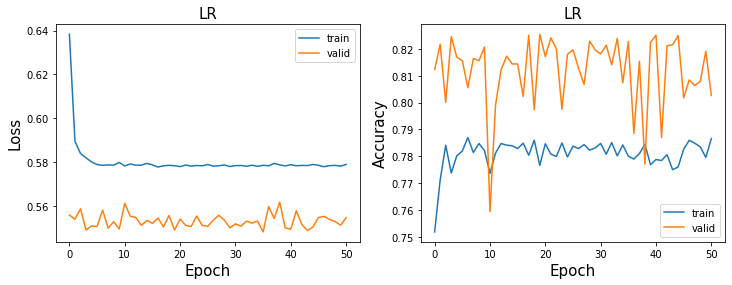

Train loss for epoch 0: 0.672538161277771
Val loss for epoch 0: 0.5920963287353516
Train loss for epoch 1: 0.6222304701805115
Val loss for epoch 1: 0.5949996113777161
Train loss for epoch 2: 0.6192807555198669
Val loss for epoch 2: 0.5909090042114258
2
Train loss for epoch 3: 0.6177476644515991
Val loss for epoch 3: 0.590480387210846
3
Train loss for epoch 4: 0.6179662346839905
Val loss for epoch 4: 0.5916377902030945
Train loss for epoch 5: 0.6179394125938416
Val loss for epoch 5: 0.594789445400238
Train loss for epoch 6: 0.6178857684135437
Val loss for epoch 6: 0.5905293226242065
Train loss for epoch 7: 0.6168380975723267
Val loss for epoch 7: 0.5901867747306824
7
Train loss for epoch 8: 0.6169061064720154
Val loss for epoch 8: 0.595912516117096
Train loss for epoch 9: 0.6175550818443298
Val loss for epoch 9: 0.5967320799827576
Train loss for epoch 10: 0.616608202457428
Val loss for epoch 10: 0.5960974097251892
Train loss for epoch 11: 0.6166254281997681
Val loss for epoch 11: 0.5882

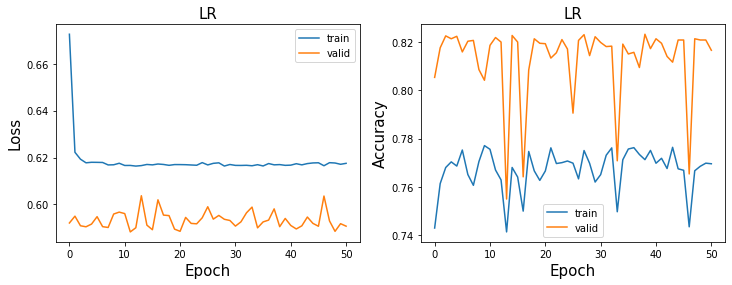

In [14]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [25]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          6
50        35
100       11


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH6_valbalanced.pt


validation loss:0.4827255606651306 accuracy:0.8194822888283378
0.5
date:180329, rec:006, time:1801.0, label:1.0
Original data 62 CH


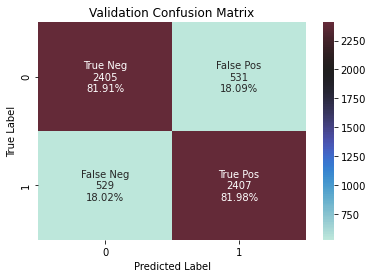

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH35_valbalanced.pt


validation loss:0.5404431819915771 accuracy:0.833957765667575
0.5
date:180329, rec:006, time:1801.0, label:1.0
Original data 62 CH


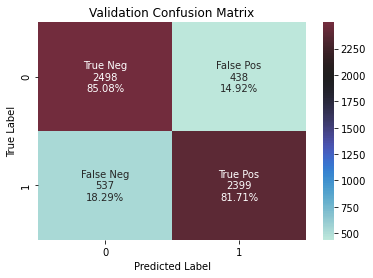

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH11_valbalanced.pt


validation loss:0.5816588401794434 accuracy:0.832425068119891
0.5
date:180329, rec:006, time:1801.0, label:1.0
Original data 62 CH


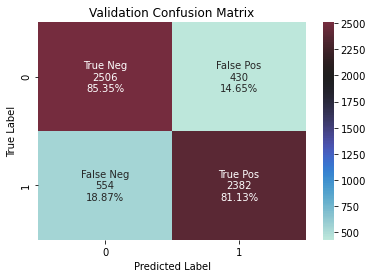

In [26]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic Regression with finite difference regularization

In [27]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 5



Train loss for epoch 0: 0.5460438132286072
Val loss for epoch 0: 0.5069122314453125
Train loss for epoch 1: 0.5233914256095886
Val loss for epoch 1: 0.5024785995483398
1
Train loss for epoch 2: 0.5156400203704834
Val loss for epoch 2: 0.5023626089096069
2
Train loss for epoch 3: 0.5096458792686462
Val loss for epoch 3: 0.4975942075252533
3
Train loss for epoch 4: 0.5059544444084167
Val loss for epoch 4: 0.497525691986084
4
Train loss for epoch 5: 0.5043193101882935
Val loss for epoch 5: 0.4949284493923187
5
Train loss for epoch 6: 0.5032591819763184
Val loss for epoch 6: 0.4985094666481018
Train loss for epoch 7: 0.5015373229980469
Val loss for epoch 7: 0.4921189844608307
7
Train loss for epoch 8: 0.500663161277771
Val loss for epoch 8: 0.4939119517803192
Train loss for epoch 9: 0.5004860162734985
Val loss for epoch 9: 0.5008656978607178
Train loss for epoch 10: 0.5000348091125488
Val loss for epoch 10: 0.5000411868095398
Train loss for epoch 11: 0.499668687582016
Val loss for epoch 11

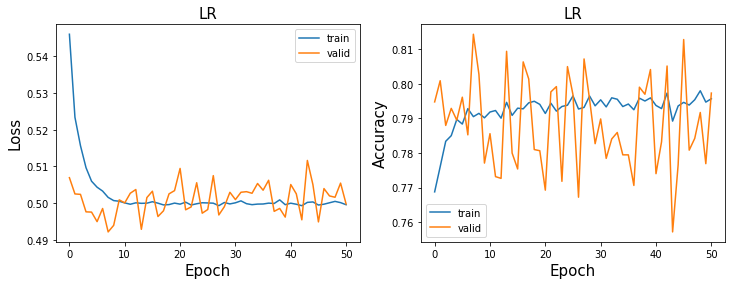

Train loss for epoch 0: 0.6228209733963013
Val loss for epoch 0: 0.5277752876281738
Train loss for epoch 1: 0.5554198622703552
Val loss for epoch 1: 0.5226284861564636
1
Train loss for epoch 2: 0.552306592464447
Val loss for epoch 2: 0.5250723958015442
Train loss for epoch 3: 0.5503568649291992
Val loss for epoch 3: 0.5199850797653198
3
Train loss for epoch 4: 0.5491759777069092
Val loss for epoch 4: 0.5218523144721985
Train loss for epoch 5: 0.548494279384613
Val loss for epoch 5: 0.5194926857948303
5
Train loss for epoch 6: 0.5479989051818848
Val loss for epoch 6: 0.5187448263168335
6
Train loss for epoch 7: 0.5474525094032288
Val loss for epoch 7: 0.5207198262214661
Train loss for epoch 8: 0.5479459762573242
Val loss for epoch 8: 0.5226388573646545
Train loss for epoch 9: 0.5481845140457153
Val loss for epoch 9: 0.5175564885139465
9
Train loss for epoch 10: 0.5482736229896545
Val loss for epoch 10: 0.5254371166229248
Train loss for epoch 11: 0.5486965179443359
Val loss for epoch 11:

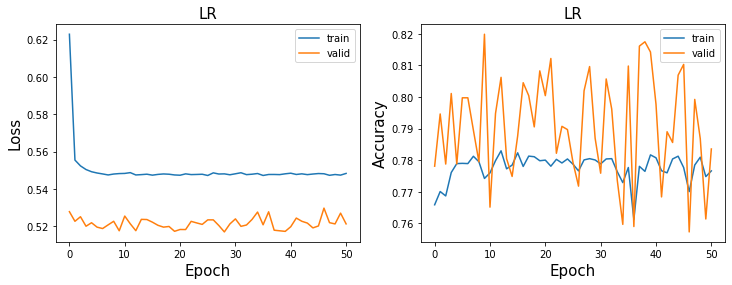

Train loss for epoch 0: 0.6782224178314209
Val loss for epoch 0: 0.5373921990394592
Train loss for epoch 1: 0.5690446496009827
Val loss for epoch 1: 0.531588077545166
1
Train loss for epoch 2: 0.567010760307312
Val loss for epoch 2: 0.5281559228897095
2
Train loss for epoch 3: 0.5652827024459839
Val loss for epoch 3: 0.528592586517334
Train loss for epoch 4: 0.5651664137840271
Val loss for epoch 4: 0.5316159129142761
Train loss for epoch 5: 0.5650668740272522
Val loss for epoch 5: 0.5313742756843567
Train loss for epoch 6: 0.5651289224624634
Val loss for epoch 6: 0.5319618582725525
Train loss for epoch 7: 0.5646390318870544
Val loss for epoch 7: 0.5335805416107178
Train loss for epoch 8: 0.5654207468032837
Val loss for epoch 8: 0.5394229888916016
Train loss for epoch 9: 0.5650312900543213
Val loss for epoch 9: 0.5299184918403625
Train loss for epoch 10: 0.5655269622802734
Val loss for epoch 10: 0.5361539125442505
Train loss for epoch 11: 0.5648902654647827
Val loss for epoch 11: 0.5264

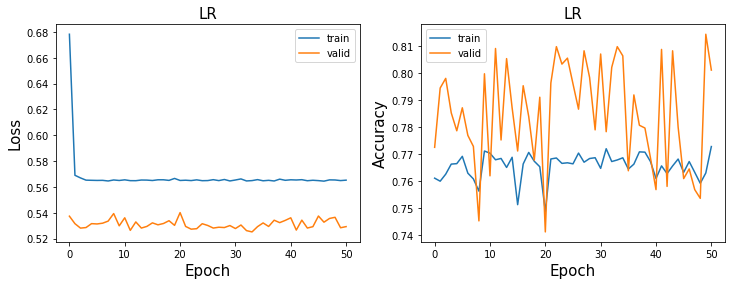

In [16]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [28]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          7
50        28
100       33


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH7_valbalanced.pt


validation loss:0.4834882318973541 accuracy:0.8261239782016349
0.5
date:180329, rec:006, time:1801.0, label:1.0
Original data 62 CH


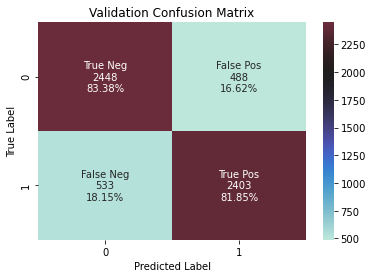

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH28_valbalanced.pt


validation loss:0.5093896985054016 accuracy:0.8201634877384196
0.5
date:180329, rec:006, time:1801.0, label:1.0
Original data 62 CH


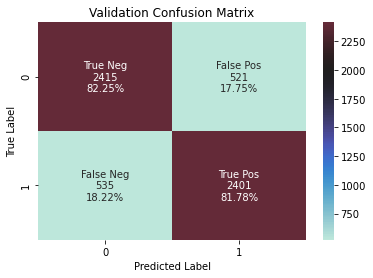

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH33_valbalanced.pt


validation loss:0.5182688236236572 accuracy:0.8188010899182562
0.5
date:180329, rec:006, time:1801.0, label:1.0
Original data 62 CH


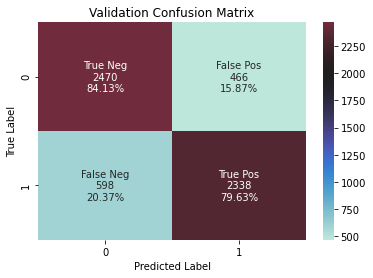

In [29]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

Done here. Not done w SVM. 

### SVM without regularization

### SVM with L2 regularization

In [15]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6851320862770081
Val loss for epoch 0: 0.7111771702766418
Train loss for epoch 1: 0.6442375183105469
Val loss for epoch 1: 0.7678999900817871
Train loss for epoch 2: 0.6391520500183105
Val loss for epoch 2: 0.7529788017272949
Train loss for epoch 3: 0.6417877078056335
Val loss for epoch 3: 0.6641672253608704
3
Train loss for epoch 4: 0.6390126347541809
Val loss for epoch 4: 0.6984342932701111
Train loss for epoch 5: 0.6404396295547485
Val loss for epoch 5: 0.7401537895202637
Train loss for epoch 6: 0.639179527759552
Val loss for epoch 6: 0.6993381977081299
Train loss for epoch 7: 0.6405513882637024
Val loss for epoch 7: 0.6649073362350464
Train loss for epoch 8: 0.6384839415550232
Val loss for epoch 8: 0.6716033816337585
Train loss for epoch 9: 0.6426579356193542
Val loss for epoch 9: 0.7246717214584351
Train loss for epoch 10: 0.6410369277000427
Val loss for epoch 10: 0.714557945728302
Train loss for epoch 11: 0.640546977519989
Val loss for epoch 11: 0.700012

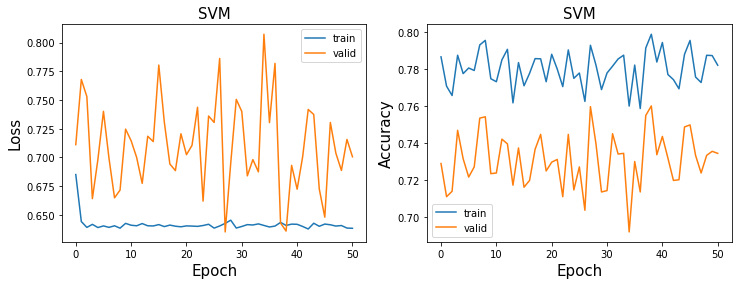

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [16]:
best_epoch = 27

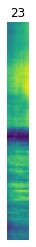

In [17]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.9384552836418152 accuracy:0.6475384615384615


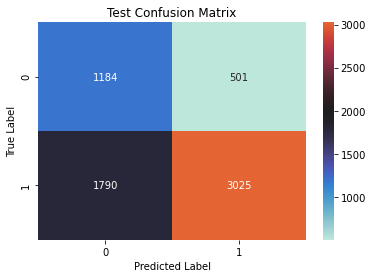

In [19]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


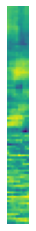

In [20]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_4[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6690675616264343
Val loss for epoch 0: 0.7053626179695129
Train loss for epoch 1: 0.579605758190155
Val loss for epoch 1: 0.6587177515029907
1
Train loss for epoch 2: 0.5777973532676697
Val loss for epoch 2: 0.661455512046814
Train loss for epoch 3: 0.5772103071212769
Val loss for epoch 3: 0.6873345375061035
Train loss for epoch 4: 0.5797932744026184
Val loss for epoch 4: 0.6312553286552429
4
Train loss for epoch 5: 0.5747454762458801
Val loss for epoch 5: 0.6387228965759277
Train loss for epoch 6: 0.5753779411315918
Val loss for epoch 6: 0.6457529067993164
Train loss for epoch 7: 0.5756300687789917
Val loss for epoch 7: 0.570262610912323
7
Train loss for epoch 8: 0.5766920447349548
Val loss for epoch 8: 0.6651206016540527
Train loss for epoch 9: 0.5784576535224915
Val loss for epoch 9: 0.6457962989807129
Train loss for epoch 10: 0.5766485929489136
Val loss for epoch 10: 0.6799610257148743
Train loss for epoch 11: 0.577312171459198
Val loss for epoch 11: 0.635

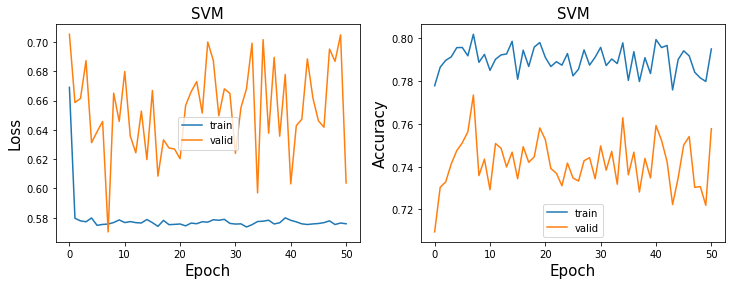

In [30]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 7

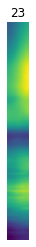

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8175214529037476 accuracy:0.6916923076923077


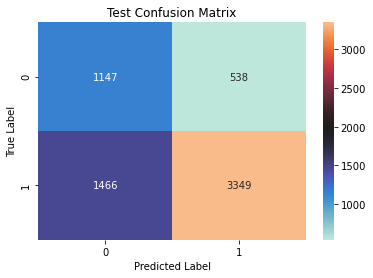

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


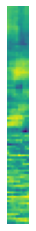

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_5[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()